In [1]:
import os
os.environ["PYSPARK_PYTHON"]="C:\\Anaconda3\\python.exe"
os.environ["PYSPARK_DRIVER_PYTHON"]="C:\\Anaconda3\\python.exe"

In [2]:
import pyspark

myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession\
    .builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [3]:
myDf = spark\
        .read.format('com.databricks.spark.csv')\
        .options(header='true', inferschema='true')\
        .load(os.path.join('data','서울특별시_공공자전거 일별 대여건수_(2018_2019.03).csv'))

In [4]:
myDf.show(5)

+----------+-----+
|      date|count|
+----------+-----+
|2018-01-01| 4950|
|2018-01-02| 7136|
|2018-01-03| 7156|
|2018-01-04| 7102|
|2018-01-05| 7705|
+----------+-----+
only showing top 5 rows



### 문제 1-1: 년도별 대여건수 합계

In [5]:
myDf = myDf.withColumn("year",myDf.date.substr(1, 4))
myDf = myDf.withColumn("month",myDf.date.substr(6, 2))

In [6]:
myDf.groupBy('year').agg({"count":"sum"}).show()

+----+----------+
|year|sum(count)|
+----+----------+
|2019|   1871935|
|2018|  10124874|
+----+----------+



### 문제 1-2: 년도별, 월별 대여건수 합계

In [7]:
myDf.groupBy('year').pivot('month').agg({"count":"sum"}).orderBy("year").show()

+----+------+------+------+------+------+-------+-------+-------+-------+-------+------+------+
|year|    01|    02|    03|    04|    05|     06|     07|     08|     09|     10|    11|    12|
+----+------+------+------+------+------+-------+-------+-------+-------+-------+------+------+
|2018|164367|168741|462661|687885|965609|1207123|1100015|1037505|1447993|1420621|961532|500822|
|2019|495573|471543|904819|  null|  null|   null|   null|   null|   null|   null|  null|  null|
+----+------+------+------+------+------+-------+-------+-------+-------+-------+------+------+



### 문제 1-3: 년도별, 월별 대여건수 그래프

In [8]:
_myDf = myDf.withColumn("year-month",myDf.date.substr(1, 7))

In [9]:
data_2018 = _myDf.filter(_myDf['year'] == 2018).groupBy('year-month').agg({"count":"sum"}).orderBy('year-month')
data_2019 = _myDf.filter(_myDf['year'] == 2019).groupBy('year-month').agg({"count":"sum"}).orderBy('year-month')

In [10]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]
data18 = data_2018.rdd.map(lambda fields:fields[1]).collect()
data19 = data_2019.rdd.map(lambda fields:fields[1]).collect()

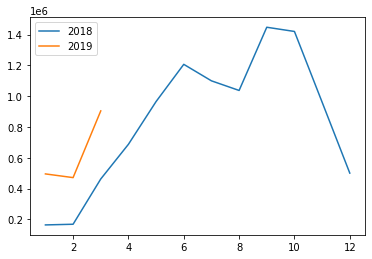

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

data19 = np.append(data19,[None]*9)

plt.plot(np.array(month), np.array(data18))
plt.plot(np.array(month), np.array(data19))
plt.legend(['2018', '2019'])
plt.show()